# Probem Statement

### For any video YouTube provides some data metrices such as Views, Likes, Comments, Shares, etc available publically. Based on these data metrices one has to predict the ad views i.e. views earned through advertizements. 

# 1. Loading the training data from ad_train.csv

In [1]:
#importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
#loading the data training and testing data into pandas dataframes.
data_train = pd.read_csv("data/mn/ad_org_train.csv")

# 2. Data cleaning and Data visualizaton

In [3]:
display(data_train.head(n=5))

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
print "Lenght of data_train :%d"%len(data_train)

Lenght of data_train :14999


#### There are some entries in various columns(apart from category column) having value 'F', we have to remove those rows.

In [5]:
#removing the columns int data_train which contains 'F' in views, likes, dislikes,
#comment, published, duration, category and adview
def remove_F(data):
    data = data[data.likes!='F']
    data = data[data.views!='F']
    data = data[data.dislikes!='F']
    data = data[data.comment!='F']
    data = data[data.published!='F']
    data = data[data.duration!='F']
    #reindexing the dataframe
    data = data.reset_index(drop=True)
    return data



In [6]:
data_train = remove_F(data_train)

print "New length of dataframe: %d"%(len(data_train))

New length of dataframe: 14637


#### Likes, dislikes, comment and views are of str type, we have to convert them into int64 so that we can pass them to a model for analysis.

In [7]:
#function for converting likes, dislikes and comments to int64
def convert_to_int(data):
    index_to_int = ['likes', 'dislikes', 'comment', 'views']
    for index in index_to_int:
        data[index] =  data[index].apply(np.int64)
    return data

In [8]:
#converting likes, dislikes and comments to int64 data type
data_train = convert_to_int(data_train)


#### Duration of the video is in ISO 8601 format, we have to convert it into some suitable format.

In [9]:
#function to convert duration from ISO 8601 format to seconds.
import re

def YTDurationToSeconds(duration):
  match = re.match('PT(\d+H)?(\d+M)?(\d+S)?', duration).groups()
  hours = _js_parseInt(match[0]) if match[0] else 0
  minutes = _js_parseInt(match[1]) if match[1] else 0
  seconds = _js_parseInt(match[2]) if match[2] else 0
  return hours * 3600 + minutes * 60 + seconds


def _js_parseInt(string):
    return int(''.join([x for x in string if x.isdigit()]))

In [10]:
durations_in_sec = [YTDurationToSeconds(duration_in_sec) for duration_in_sec in data_train["duration"]]
data_train.duration = durations_in_sec

#### Published date is in %Y-%M-%D format, we convert it number of days representing how many days ago the video was published

In [11]:
#function to convert the date from %Y-%M-%D format to the number of days the video was published.
from datetime import datetime
date_format = "%Y-%m-%d"

def published_days_ago(date, date_format):
    date =  datetime.strptime(date, date_format)
    date_now = datetime.now()
    days_ago = (date_now - date).days
    return days_ago

In [12]:
days_ago_list = [published_days_ago(date_of_published, date_format) for date_of_published in data_train["published"]]
data_train.published = days_ago_list

## Visualization

#### Max, min, mean, median, std of adview.

In [74]:
ad_view = data_train['adview']
max_ad_view = np.max(ad_view)
min_ad_view = np.min(ad_view)
mean_ad_view = np.mean(ad_view)
median_ad_view = np.median(ad_view)
std_ad_view = np.std(ad_view)

print "Max ad views: %f"%(max_ad_view)
print "Min ad views: %f"%(min_ad_view)
print "Mean ad view %f"%(mean_ad_view)
print "Median ad view %f"%(median_ad_view)
print "Standrad deviation of ad view %f"%(std_ad_view)

Max ad views: 5429665.000000
Min ad views: 1.000000
Mean ad view 2066.029719
Median ad view 2.000000
Standrad deviation of ad view 52825.251079


### visualizing the relationship between various features

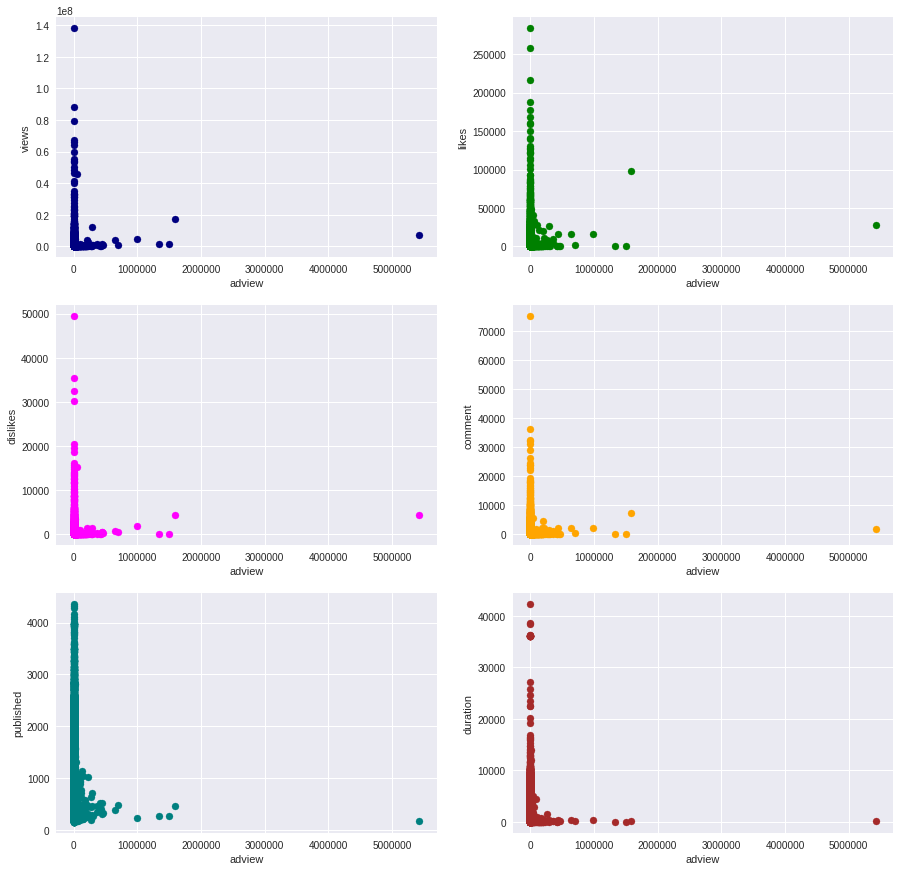

In [75]:
adview = data_train['adview']
views = data_train['views']
likes = data_train['likes']
dislikes = data_train['dislikes']
comment = data_train['comment']
published = data_train['published']
duration = data_train['duration']


np.random.seed(19680801)


x = np.random.rand(10)
y = np.random.rand(10)

#plotting a scatter plot between adview and view
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.scatter(adview, views, c='navy')
plt.ylabel("views")
plt.xlabel("adview")

#plotting a scatter plot between adview and likes
plt.subplot(322)
plt.scatter(adview, likes, c='green')
plt.ylabel("likes")
plt.xlabel("adview")

#plotting a scatter plot between adview and dislikes
plt.subplot(323)
plt.scatter(adview, dislikes, c='magenta')
plt.ylabel("dislikes")
plt.xlabel("adview")

#plotting a scatter plot between adview and comment
plt.subplot(324)
plt.scatter(adview, comment, c='orange')
plt.ylabel("comment")
plt.xlabel("adview")

#plotting a scatter plot between adview and published
plt.subplot(325)
plt.scatter(adview,published, c='teal')
plt.ylabel("published")
plt.xlabel("adview")

#plotting a scatter plot between adview and duration
plt.subplot(326)
plt.scatter(adview, duration, c='brown')
plt.ylabel("duration")
plt.xlabel("adview")

plt.show()

It seems like there are some outliers in the data which can affect the results of our model.

#### visualizing the adview per category

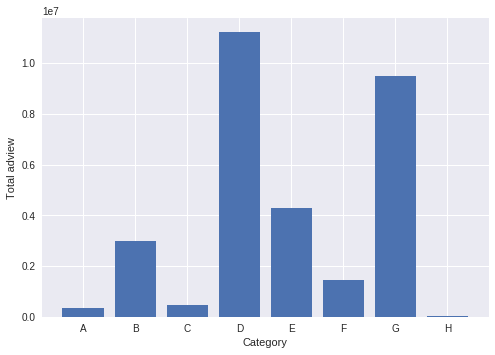

In [129]:
ad_by_category = data_train["adview"].groupby(data_train['category']).aggregate(sum)
x = np.arange(8)
fig, ax = plt.subplots()
plt.bar(x, ad_by_category)
plt.xticks(x, ('A','B','C','D','E','F','G','H'))
plt.xlabel("Category")
plt.ylabel("Total adview")
plt.show()

It seems like category is an important feature for determining the number of adviews. We have to find that whether the videos of categories D and G tends to have large **adview** or the simply they have large number of samples in the dataset.

#### Number of samples per category

In [77]:
categories = ['A','B','C','D','E','F','G','H']
sampels_of_each_cat = [len(data_train[data_train['category']==cat]) for cat in categories]

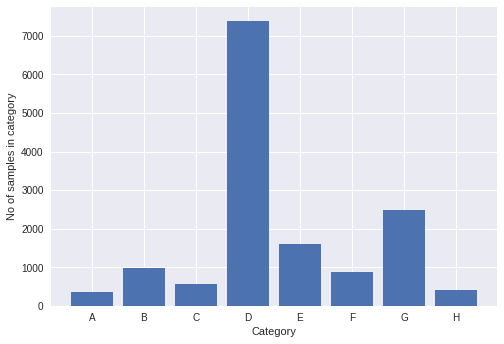

In [124]:
x = np.arange(8)
fig1, ax1 = plt.subplots()
plt.bar(np.arange(8), sampels_of_each_cat)
plt.xticks(x, ('A','B','C','D','E','F','G','H'))
plt.xlabel("Category")
plt.ylabel("No of samples in category")
plt.show()

It is clear that there are large number of samples in 'D' and 'G' categories.

#### Correlation between various features

In [80]:
import seaborn as sns
corr = data_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr



,adview,views,likes,dislikes,comment,published,duration
adview,1.000000,0.032807,0.044650,0.036609,0.016104,-0.037334,-0.012710
views,0.032807,1.000000,0.726716,0.730320,0.410662,-0.018109,0.002509
likes,0.044650,0.726716,1.000000,0.648876,0.651202,-0.091745,-0.042572
dislikes,0.036609,0.730320,0.648876,1.000000,0.532548,-0.038694,0.001495
comment,0.016104,0.410662,0.651202,0.532548,1.000000,-0.102845,-0.037499
published,-0.037334,-0.018109,-0.091745,-0.038694,-0.102845,1.000000,-0.017675
duration,-0.012710,0.002509,-0.042572,0.001495,-0.037499,-0.017675,1.000000


# 3. Model 1 (Benchmark)

#### Seperating data into target and features

In [79]:
#seperate data_train into target and features
target = data_train['adview']
features_raw = data_train.drop(['adview','vidid'], axis=1)

In [81]:
#Encoding the fearues_raw.
features = pd.get_dummies(features_raw)

#### Splitting the data into training and testing subsets

In [179]:
from sklearn.model_selection import train_test_split

#split the 'features' and 'target' data into trainign and testing set.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2,
                                                    random_state = 17)
# Show the results of the split
print "Training set has %d samples."%X_train.shape[0]
print "Testing set has %d samples."%X_test.shape[0]

Training set has 11709 samples.
Testing set has 2928 samples.


#### Using Grid Search to find the best parameters.

In [180]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#defining parameter grid for Grid Search Cross-Validation
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
             'max_depth': [4,6],
             'min_samples_leaf': [3,5,9,17],
             'max_features': [None, 1.0, 0.3, 0.1]}

clf = GradientBoostingRegressor(n_estimators=3000)
clf_cv_model1 = GridSearchCV(clf, param_grid).fit(X_train, y_train)

In [181]:
# Printing the parameter setting that gave the best results on the hold out data
clf_cv_model1.best_params_

{'learning_rate': 0.02,
 'max_depth': 6,
 'max_features': 0.1,
 'min_samples_leaf': 3}

In [182]:
predictions = clf_cv_model1.predict(X_test)

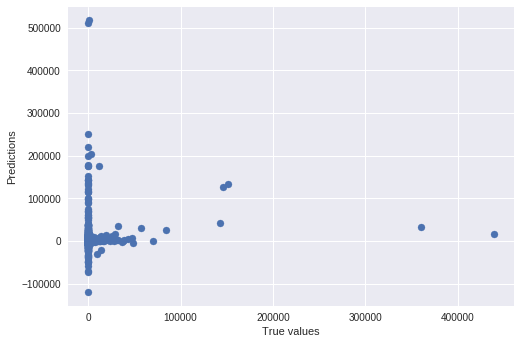

In [188]:
plt.scatter(y_test, predictions)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [189]:
from sklearn.metrics import r2_score

print r2_score(y_test, predictions)

-2.68040288996


### R2 score of Benchmark model : -2.68040288996


.


.



.

# 4. Model 2 ( using 'huber' loss function)

In [147]:
target = data_train['adview']
features_raw = data_train.drop(['adview','vidid'], axis=1)
features = pd.get_dummies(features_raw)

In [18]:
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#split the 'features' and 'target' data into trainign and testing set.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2,
                                                    random_state = 17)


learning_rate = 0.02
max_depth = 6
min_samples_leaf = 17
max_features =  0.1
n_estimators = 3000
loss = 'huber'


clf = GradientBoostingRegressor(loss=loss, n_estimators=n_estimators,learning_rate=learning_rate,
                                max_features=max_features,max_depth=max_depth, min_samples_leaf=min_samples_leaf)

clf_model2 = clf.fit(X_train, y_train)

In [19]:
predictions_model2 = clf_model2.predict(X_test)

In [21]:
from sklearn.metrics import r2_score

print r2_score(y_test, predictions_model2)

0.0986760932885


In [22]:
from sklearn.metrics import mean_squared_error

print mean_squared_error(y_test, predictions_model2)

131476501.837


### Model 2 R2 score : 0.0986760932885



.


.




.




# 5. Model 3 (removing outliers from non standardize input)

In [125]:
data_without_outlier = data_train[data_train.adview<600000]
data_without_outlier = data_without_outlier[data_without_outlier.likes<200000]
data_without_outlier = data_without_outlier[data_without_outlier.dislikes<20000]
data_without_outlier = data_without_outlier[data_without_outlier.comment<40000]
data_without_outlier = data_without_outlier[data_without_outlier.duration<30000]


In [127]:
data_without_outlier = data_without_outlier.reset_index(drop=True)

In [128]:
target = data_without_outlier['adview']
features_raw = data_without_outlier.drop(['adview','vidid'], axis=1)
features = pd.get_dummies(features_raw)

In [404]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2,
                                                    random_state = 17)

In [406]:
clf_model3 = clf.fit(X_train, y_train)

In [409]:
predictions_model3 = clf_model3.predict(X_test)

print r2_score(y_test, predictions_model3)

0.0624198863012


### Model 3 R2 score : 0.0624198863012



.



.



.



# 6. Model 4 (using standardize features)

However, there is no need to normalize/standardize the features for Gradient Boosting Regressor. But we measure that how the model performs when we give it standardize features.

In [144]:
from sklearn.preprocessing import MinMaxScaler

#standradize the features using min max scaler
scaler = MinMaxScaler()
numerical = ['adview','views','likes','dislikes','comment','published','duration']
data_train[numerical] = scaler.fit_transform(data_train[numerical])

In [145]:
target = data_train['adview']
features_raw = data_train.drop(['adview','vidid'], axis=1)
features = pd.get_dummies(features_raw)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2,
                                                    random_state = 17)

In [399]:
clf_model4 = clf.fit(X_train, y_train)

In [341]:
predictions_model4 = clf_model4.predict(X_test)

In [343]:
from sklearn.metrics import r2_score

print r2_score(y_test, predictions_model4)

-0.00617944471031


### Model 4 R2 score : -0.00617944471031


.



.



.


# 7. Final model

In [13]:
target = data_train['adview']
features_raw = data_train.drop(['adview','vidid'], axis=1)
features = pd.get_dummies(features_raw)

In [14]:
features = features.drop(['category_A','category_B','category_C','category_D','category_E','category_F','category_G','category_H'], axis=1)

In [15]:
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#split the 'features' and 'target' data into trainign and testing set.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2,
                                                    random_state = 17)


learning_rate = 0.02
max_depth = 6
min_samples_leaf = 17
max_features =  0.1
n_estimators = 3000
loss = 'huber'

clf = GradientBoostingRegressor(loss=loss, n_estimators=n_estimators,learning_rate=learning_rate,
                                max_features=max_features,max_depth=max_depth, min_samples_leaf=min_samples_leaf)

clf_final = clf.fit(X_train, y_train)

In [16]:
predictions_final = clf_final.predict(X_test)

In [19]:
from sklearn.metrics import r2_score

print r2_score(y_test, predictions_final)

0.115149209808


## R2 score achieved by the final model: 0.115149209808



.




.




.



# 8. Making prediction

## Loading testing data from ad_org_test.csv

In [44]:
data_test = pd.read_csv("data/mn/ad_org_test.csv")

#### Preprocessing

In [31]:
#removing the rows having value 'F' in likes, view, dislikes, comment, published and duration column
data_test = data_test[data_test.likes!='F']
data_test = data_test[data_test.views!='F']
data_test = data_test[data_test.dislikes!='F']
data_test = data_test[data_test.comment!='F']
data_test = data_test[data_test.published!='F']
data_test = data_test[data_test.duration!='F']

In [45]:
#removing the rows having value 'F' in likes, view, dislikes, comment, published and duration column
data_test = remove_F(data_test)

In [47]:
data_test = convert_to_int(data_test)

In [49]:
durations_in_sec = [YTDurationToSeconds(duration_in_sec) for duration_in_sec in data_test["duration"]]
data_test.duration = durations_in_sec

In [50]:
days_ago_list = [published_days_ago(date_of_published, date_format) for date_of_published in data_test["published"]]
data_test.published = days_ago_list

In [92]:
vidids = data_test['vidid']
features_raw = data_test.drop(['vidid'], axis=1)
features = pd.get_dummies(features_raw)

In [93]:
features = features.drop(['category_A','category_B','category_C','category_D','category_E','category_F','category_G','category_H'], axis=1)

In [57]:
final_predictions = clf_final.predict(features)

In [94]:
final_predictions = [0 if i < 0 else int(i) for i in final_predictions]

In [95]:
final_predictions = pd.Series(final_predictions)

result = {'vid_id': vidids,
         'ad_view': final_predictions}

In [96]:
result_df = pd.DataFrame(result)

In [97]:
display(result_df.head(n=5))

,ad_view,vid_id
0,1,VID_1054
1,10,VID_18629
2,4,VID_13967
3,28,VID_19442
4,12,VID_770


In [98]:
result_df = result_df[['vid_id', 'ad_view']]

In [99]:
display(result_df.head(n=5))

,vid_id,ad_view
0,VID_1054,1
1,VID_18629,10
2,VID_13967,4
3,VID_19442,28
4,VID_770,12


In [101]:
result_df.to_csv('result.csv')

In [102]:
result_df.to_csv('result.txt')

# Conclusion

Initially, I thought that the problem was pretty easy. But, it comes out to be a challenging one for me. I researched and try to implement various algorithms like Linear Regression, Lasso, SGDRegressor and Gradient Boosting Regressor out of which GradientBoosting Regressor perform comparatively better. After cross-validation and careful parameter tuning my model was only able to achieve a R2_score of 0.115149209808